# Please follow this notebook for a 2d example. It should be straightforward to adapt this script for higher dimesnions.

In [1]:
import fvgp
from fvgp import gp
import numpy as np
import matplotlib.pyplot as plt

## Let's define a latent function and the data.

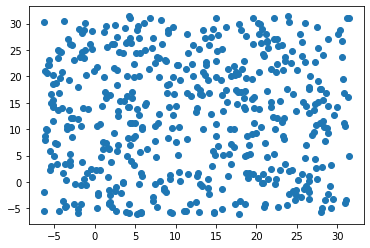

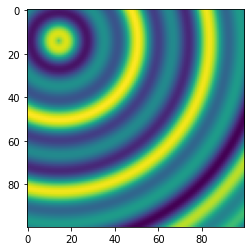

In [4]:
def function(x):
    return np.sin(1.1 * np.linalg.norm(x, axis = 1))+np.cos(0.5 * np.linalg.norm(x,axis = 1))
x_data = np.random.uniform(low = -2*np.pi, high = 10*np.pi, size = (500,2))
y_data = function(x_data)
plt.scatter(x_data[:,0],x_data[:,1])
plt.show()
x1,x2 = np.linspace(-5,30,100),np.linspace(-5,30,100)
x_pred = np.transpose([np.tile(x1, len(x2)), np.repeat(x2, len(x1))])
plt.imshow(function(x_pred).reshape(100,100))
plt.show()

## Next, initialize the GP object and train the hyperparameters

In [5]:
obj = gp.GP(2, x_data,y_data, init_hyperparameters = np.array([10,10,10]),use_inv = False)

In [6]:
hyper_param_bounds = np.array([[0.0001, 50.],[ 0.001, 1000],[ 0.001, 1000]])
##this will block the main thread, even if you use "hgdl", another option is "global" or "local"
obj.train(hyper_param_bounds, method = "global")

In [7]:
print("Have a look at the hyperparameters: ",obj.hyperparameters)
print("Do they look OK?")

Have a look at the hyperparameters:  [2.8574537  4.80096486 4.59619253]
Do they look OK?


## Prediction 

In [8]:
x1,x2 = np.linspace(-5,30,100),np.linspace(-5,30,100)
x_pred = np.transpose([np.tile(x1, len(x2)), np.repeat(x2, len(x1))])

### Posterior Mean 

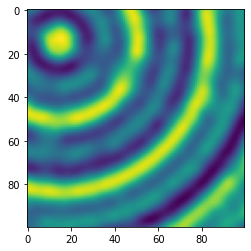

In [9]:
f = obj.posterior_mean(x_pred)["f(x)"]
plt.imshow(f.reshape(100,100))
plt.show()

### Posterior Variance 

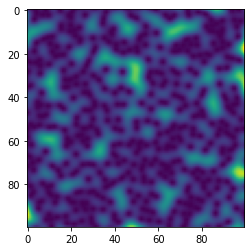

In [10]:
plt.imshow(obj.posterior_covariance(x_pred)["v(x)"].reshape(100,100))
plt.show()

### What about some gradients... 

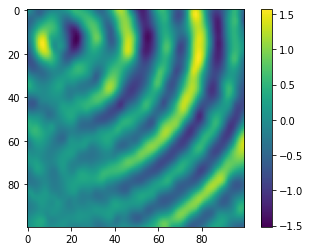

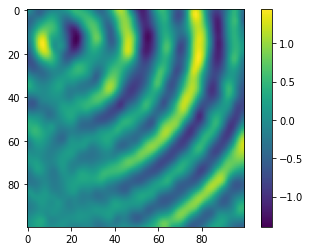

In [11]:
###Be aware here that np.gradient(...)[1] is actually the x-direction
a = plt.imshow(obj.posterior_mean_grad(x_pred)["df/dx"][:,0].reshape(100,100))
plt.colorbar(a)
plt.show()
a = plt.imshow(np.gradient(obj.posterior_mean(x_pred)["f(x)"].reshape(100,100), 12.*np.pi / 100.0)[1])
plt.colorbar(a)
plt.show()

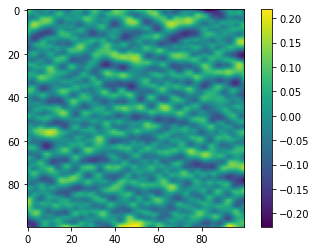

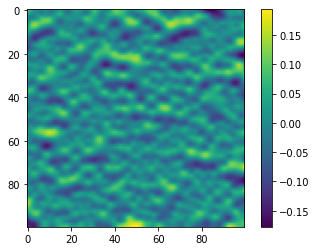

In [12]:
grad = obj.posterior_covariance_grad(x_pred)["dv/dx"][:,1].reshape(100,100)
appr = np.gradient(obj.posterior_covariance(x_pred)["v(x)"].reshape(100,100), 12.*np.pi / 100.0)[0]
a = plt.imshow(grad)
plt.colorbar(a)
plt.show()
a = plt.imshow(appr)
plt.colorbar(a)